<a href="https://colab.research.google.com/github/rim-yu/SGU_ANT6320_Assignment/blob/master/Exercise04_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB

https://course.fast.ai/videos/?lesson=4
01:05



In [0]:
%reload_ext autoreload
%autoreload 2
# reload automatically.
%matplotlib inline
# notebook을 실행한 browser에서 바로 Rich output을 볼 수 있게 해주는 command. 

In [0]:
from fastai.text import *
# fastai.text의 모든 module을 import한다.

## Preparing the data

First let's download the dataset we are going to study. The [dataset](http://ai.stanford.edu/~amaas/data/sentiment/) has been curated by Andrew Maas et al. and contains a total of 100,000 reviews on IMDB. 25,000 of them are labelled as positive and negative for training, another 25,000 are labelled for testing (in both cases they are highly polarized). The remaning 50,000 is an additional unlabelled data (but we will find a use for it nonetheless).

We'll begin with a sample we've prepared for you, so that things run quickly before going over the full dataset.

In [3]:
path = untar_data(URLs.IMDB_SAMPLE) 
path.ls()
# url을 통해 IMDB_SAMPLE file의 path를 가져온다. 
# IMDB : Internet Movie DataBase

# IMDB dataset에는 영화 리뷰가 있음. 리뷰는 긍정적이거나 부정적이다. 
# 이 dataset은 csv file로 저장되었고 pandas로 열어볼 수 있다.  

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [0]:
cd /root/\.fastai/data/imdb_sample

/root/.fastai/data/imdb_sample


In [0]:
ls

texts.csv


It only contains one csv file, let's have a look at it.

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()
# texts.csv file을 df에 저장하고 첫 5개 행을 보여준다. 

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [0]:
df['text'][1]
# 'text' 열의 2번째 행을 보여준다. 

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

It contains one line per review, with the label ('negative' or 'positive'), the text and a flag to determine if it should be part of the validation set or the training set. If we ignore this flag, we can create a DataBunch containing this data in one line of code:

In [5]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')
# csv fil e을 통해 TextDataBunch를 생성, data_lm에 저장한다. 

By executing this line a process was launched that took a bit of time. Let's dig a bit into it. Images could be fed (almost) directly into a model because they're just a big array of pixel values that are floats between 0 and 1. A text is composed of words, and we can't apply mathematical functions to them directly. We first have to convert them to numbers. This is done in two differents steps: tokenization and numericalization. A `TextDataBunch` does all of that behind the scenes for you.

Before we delve into the explanations, let's take the time to save the things that were calculated.

In [0]:
data_lm.save()
# data_lm을 저장한다. 

Next time we launch this notebook, we can skip the cell above that took a bit of time (and that will take a lot more when you get to the full dataset) and load those results like this:

In [0]:
data = load_data(path)
# path를 통해 data를 load한다. 

### Tokenization

The first step of processing we make the texts go through is to split the raw sentences into words, or more exactly tokens. The easiest way to do this would be to split the string on spaces, but we can be smarter:

- we need to take care of punctuation(구두점)
- some words are contractions of two different words, like isn't or don't
- we may need to clean some parts of our texts, if there's HTML code for instance 
(HTML : 웹 문서를 만들기 위하여 사용하는 기본적인 프로그래밍 언어의 한 종류)

To see what the tokenizer had done behind the scenes, let's have a look at a few texts in a batch.

In [10]:
data = TextClasDataBunch.from_csv(path, 'texts.csv') 
data.show_batch()
# csv file을 통해 TextClasDataBunch를 생성, data에 저장한다. 
# show_batch()를 통해 data를 보여준다. 
# 토큰화된 단어를 우리에게 돌려줄 것임. 

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


The texts are truncated at 100 tokens for more readability. We can see that it did more than just split on space and punctuation symbols: 
- the "'s" are grouped together in one token
- the contractions are separated like this: "did", "n't"
- content has been cleaned for any HTML symbol and lower cased
- there are several **special tokens (all those that begin by xx)**, to replace unknown tokens (see below) or to introduce different text fields (here we only have one).

### Numericalization

Once we have extracted tokens from our texts, we convert to integers by creating a list of all the words used. We only keep the ones that appear at least twice with a maximum vocabulary size of 60,000 (by default) and replace the ones that don't make the cut by the unknown token `UNK`.

The correspondance from ids to tokens is stored in the `vocab` attribute of our datasets, in a dictionary called `itos` (for int to string).

In [11]:
data.vocab.itos[:10]
# Get the first ten in order of frequency.
# 모든 영화 리뷰에 나타나는 10개의 고유한 단어 토큰임. 빈도가 잦은 순. 
# 일반적인 단어가 아님. -> 이거 왜 있나. 

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

And if we look at what a what's in our datasets, we'll see the tokenized text as a representation:

In [12]:
data.train_ds[0][0]
# datasets에 무엇이 있는지 알아본다. 
# https://mc.ai/fastai-lesson-4-notes-nlp/

Text xxbos xxmaj oh dear . xxmaj yet another example of " xxmaj xxunk " and religion . xxmaj no doubt we 'll be seeing some depressing nonsense featuring some " hunky and macho freedom xxunk " from the xxup ira . xxmaj well that was my initial reaction when the credits started but just over an hour and a half later i was in a state of shock . xxmaj what a superb movie 
 
  xxmaj the story starts on the day of the wedding between xxmaj sean xxmaj cloney and xxmaj sheila xxmaj kelly in the 1950s . xxmaj there is a slight problem since they 're getting married in the catholic church and that is xxmaj sheila is a protestant but in order for the wedding to happen xxmaj sheila takes a pledge that her children will be brought up catholic and attend the catholic school when they 're old enough . xxmaj the story - xxmaj which is set in the 1950s - then jumps forward a few years when the xxmaj cloney daughters are about to start school but xxmaj sheila has decided they 'll be xxunk the local pro

But the underlying data is all numbers

In [13]:
data.train_ds[0][0].data[:10] 
# 다음 각 영화 리뷰를 값 목록으로 변환한다. 
# 숫자 열의 각 값은 토큰 위치에 해당한다. 여기서 2는 첫 번째 토큰 'xxunk'를 나타냄. 

array([   2,    5,  431, 2191,   11,    5,  283,  206,  653,   14])

### With the data block API

We can use the data block API with NLP and have a lot more flexibility than what the default factory methods offer. In the previous example for instance, the data was randomly split between train and validation instead of reading the third column of the csv.

With the data block API though, we have to manually call the tokenize and numericalize steps. This allows more flexibility, and if you're not using the defaults from fastai, the various arguments to pass will appear in the step they're revelant, so it'll be more readable.

In [20]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2) # validation flag.
                .label_from_df(cols=0) # 긍정적이거나 부정적이거나. 
                .databunch())
# csv file을 통해 TextList를 생성, data에 저장한다. 

In [0]:
"""
data = (TextSplitData.from_csv(path, 'texts.csv', input_cols=1, label_cols=0, valid_cols=2)
        .dataset(TextDataset) # 데이터셋을 만들어준다. 
        .tokenize() # 토큰화 변환을 수행. 
        .numericalize() # 수치 변환을 수행. 
        .databunch(TextDataBunch)) # databunc를 생성. 
"""

## Language model

Note that language models can use a lot of GPU, so you may need to decrease batchsize here.

In [0]:
bs=48
# batch size = 48.

Now let's grab the full dataset for what follows.

In [22]:
path = untar_data(URLs.IMDB) 
path.ls()
# url을 통해 IMDB file의 path를 가져온다. 
# 25,000개의 train에 대한 리뷰가 있고, 25,000개의 valid에 대한 리뷰. 5만개의 감독되지(unsupervised) 않은 리뷰.? 

[PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab')]

In [23]:
(path/'train').ls()
# train folder에 있는 file을 보여준다. 

[PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/pos'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg')]

The reviews are in a training and test set following an imagenet structure. The only difference is that there is an `unsup` folder on top of `train` and `test` that contains the unlabelled data.

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipedia called [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset)). That model has been trained to guess what the next word is, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviews left by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust the parameters of our model by a little bit. Plus there might be some words that would be extremely common in the reviews dataset but would be barely present in wikipedia, and therefore might not be part of the vocabulary the model was trained on.

This is where the unlabelled data is going to be useful to us, as we can use it to fine-tune our model. Let's create our data object with the data block API (next line takes a few minutes).

In [24]:
data_lm = (TextList.from_folder(path) # 텍스트 파일 목록 
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1) # 무작위로 10%로 나눔. 
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl') # 로컬에 저장된 파일. 

# train set과 test set를 연결하고 더 작은 valid set을 사용하여 언어를 훈련시킬 더 많은 데이터를 얻는다. 

In [0]:
"""
data_Im = (TextFileList.from_folder(path)
           .label_const(0)
           .split_by_folder(valid='test')
           .datasets()
           .tokenize()
           .numericalize()
           .databunch(TextLMDataBunch))
"""

We have to use a special kind of `TextDataBunch` for the language model, that ignores the labels (that's why we put 0 everywhere), will shuffle the texts at each epoch before concatenating them all together (only for training, we don't shuffle for the validation set) and will send batches that read that text in order with targets that are the next word in the sentence.

The line before being a bit long, we want to load quickly the final ids by using the following cell.

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)
# data를 load해서 data_Im에 저장한다. 

In [26]:
data_lm.show_batch()
# data_Im을 보여준다. 

idx,text
0,"on the imdb ( mainly those who saw the newer version first ) seem to be fiercely unkind to this version xxrep 4 . but if one applies a little common sense , and takes into consideration the time when it was made and the technical possibilities that existed at that time , then they will realise that this is a pretty good film . xxmaj indeed , it was"
1,"very impressed by it . xxmaj that 's why i wanted to see it again and all i can say is that it still has n't lost its power , even though i 'm used to a lot more when it comes to movies than that i was ten years ago . \n \n ' xxmaj kalifornia ' tells the tale of the writer xxmaj brian xxmaj kessler and"
2,"with dream logic , where the focus is atmosphere , creepiness , the uncanny , and for many viewers -- scares . xxmaj how well the film works for you will largely depend on how well you can adapt yourself to , or are used to , this different approach to film - making ( although admittedly , some of the seeming gaps are filled in by previous entries in"
3,"film has . xxmaj there 's plenty of xxunk stunts , too , and even though some think they are and look gratuitous or stupid when used in films , i can not agree and think they give motion pictures the kind of magic , freedom and creativeness any other tool could not give . xxmaj when people fly in these films , it means the films are not just"
4,"about three months ago . xxmaj the whole concept about a xxmaj latin family xxup tv show really amazed me . i am surprised that finally xxmaj latinos have a good shot to be on xxup tv . xxmaj this show is probably one the best i 've seen , it 's funny , heartwarming , touchy , and nice . xxbos xxmaj yes , xxmaj keaton looks like he"


We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in `~/.fastai/models/` (or elsewhere if you specified different paths in your config file).

In [27]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)
# pretrained model을 이용해서 learner을 생성, learn에 저장한다.
# CNN model 대신 language model을 만든다. 
# 두 가지 데이터를 보내야 하는데, 우리가 사용하고자 하는 pre-trained model = 위키텍스트 파일. 
# AWD_LSTM : Weight-Dropped LSTM(Long Short-Term Memory)
# drop_mult : drop out. 1보다 작은 값에 대한 이야기. 

In [28]:
learn.lr_find()
# lr을 찾는다. 

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


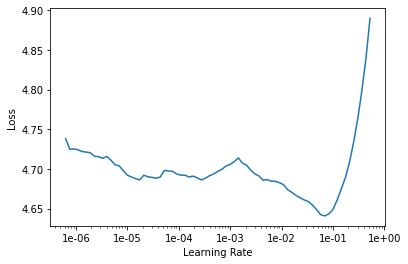

In [29]:
learn.recorder.plot(skip_end=15)
# lr과 loss의 상관관계를 보여준다. 

In [30]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
# 1 epoch 학습한다.  
# moms : Momentum's equals. 운동량을 줄이는 데 도움이 된다. 

epoch,train_loss,valid_loss,accuracy,time
0,4.151765,4.023757,0.295197,26:05


In [0]:
learn.save('fit_head')
# 학습한 learner을 저장한다. 

In [0]:
learn.load('fit_head');
# 학습한 learner을 load한다. 

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [0]:
learn.unfreeze()

In [34]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))
# 10 epochs 학습한다. accuracy 점차 증가. 

epoch,train_loss,valid_loss,accuracy,time
0,3.877629,3.842662,0.313299,26:18
1,3.851923,3.802835,0.319727,26:15
2,3.795313,3.774707,0.323622,26:18
3,3.785785,3.743859,0.327418,26:17
4,3.734906,3.718021,0.330520,26:13
5,3.664509,3.697165,0.333014,26:21
6,3.632839,3.680647,0.334970,26:16
7,3.580627,3.668744,0.336678,26:16
8,3.524276,3.665415,0.337458,26:18
9,3.511542,3.664893,0.337624,26:25


In [0]:
learn.save('fine_tuned')

How good is our model? Well let's try to see what it predicts after a few given words.

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [38]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))
# see what it predicts after a few given words.

I liked this movie because of the American " Oh my God " factor . If you really want to see a very good , well - written , well - directed , well - acted , well - directed and
I liked this movie because it had some real moments of humour , it was scary and full of suspense , and had some great characters , such as Albert Finney and George Washington . The humor is very simple


We have to save not only the model, but also its encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [0]:
learn.save_encoder('fine_tuned_enc')
# 단어를 생성하는 게 아닌 문장을 이해하는 step. 

## Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time. 

분류기를 만들기 위해 미세 조정을 수행한다. NLP 분류기 모델을 만드는 것은 이전 모델과 비슷하다는 것을 알게 되었다. 

In [0]:
path = untar_data(URLs.IMDB)
# url을 통해 IMDB file의 path를 가져온다. 

In [41]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))
# 때로는 GPU 메모리가 부족함. 메모리가 부족하면 bs를 낮추어야함. 카드에 맞는 배치 크기를 찾아야 함. 
# folder를 통해 TextList를 생성, data_clas에 저장한다. 
# 테스트 세트는 건드리지 않으므로 폴더 별로 분할한 다음 레이블을 붙인다. 
data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [43]:
data_clas.show_batch()
# data_clas를 보여준다. 

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj titanic directed by xxmaj james xxmaj cameron presents a fictional love story on the historical setting of the xxmaj titanic . xxmaj the plot is simple , xxunk , or not for those who love plots that twist and turn and keep you in suspense . xxmaj the end of the movie can be figured out within minutes of the start of the film , but the love",pos
"xxbos xxmaj polish film maker xxmaj walerian xxmaj borowczyk 's xxmaj la xxmaj bête ( xxmaj french , 1975 , aka xxmaj the xxmaj beast ) is among the most controversial and brave films ever made and a very excellent one too . xxmaj this film tells everything that 's generally been hidden and denied about our nature and our sexual nature in particular with the symbolism and silence of",pos
"xxbos xxmaj okay , so i 'm not a big video game buff , but was the game xxmaj house of the xxmaj dead really famous enough to make a movie from ? xxmaj sure , they went as far as to actually put in quick video game clips throughout the movie , as though justifying any particular scene of violence , but there are dozens and dozens of games",neg
"xxbos xxmaj prior to this release , xxmaj neil labute had this to say about the 1973 original : "" xxmaj it 's surprising how many people say it 's their favorite soundtrack . i 'm like , come on ! xxmaj you may not like the new one , but if that 's your favorite soundtrack , i do n't know if i * want * you to like",neg


We can then create a model to classify those reviews and load the encoder we saved before.

In [44]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
# overfitting이 일어날 경우 drop_mult의 값을 늘릴 수 잇음. 
learn.load_encoder('fine_tuned_enc')
# Create a model to classify those reviews and load the encoder we saved before.

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj more than twenty years before xxmaj peter xxmaj jackson 's visionary adaptation of xxmaj the xxmaj lord xxmaj of xxmaj the xxmaj rings , there was this 1978 animated effort from director xxmaj ralph xxmaj bakshi . xxmaj an ambitious and reasonably faithful version of the story , this has sadly been rather over - shadowed by the xxmaj jackson trilogy . xxmaj indeed , many reviewers here on the imdb ( mainly those who saw the newer version first ) seem to be fiercely unkind to this version xxrep 4 . but if one applies a little common sense , and takes into consideration the time when it was made and the technical possibilities that existed at that time , then they will realise that this is a pretty good film . xxmaj indeed , it was shortly after seeing this animated movie back in the early ' 80s that i sought out xxmaj tolkien 's book and immediately became a lifelong fan of these richly detailed x

In [45]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


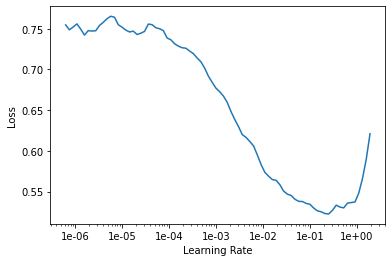

In [46]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.330005,0.259694,0.893400,05:26


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [50]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4), 1e-2), moms=(0.8,0.7))
# learning rate : 2.6에 관하여. 차별적 학습률. 하이퍼 매개변수. 랜덤 포레스트. 최적의 매개변수 설정. 

epoch,train_loss,valid_loss,accuracy,time
0,0.279007,0.219035,0.915840,05:16


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [53]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4), 5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.254364,0.192709,0.924720,06:09


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [56]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4), 1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.202985,0.177036,0.931640,05:17
1,0.192615,0.173693,0.933360,06:01


In [57]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([7.1944e-05, 9.9993e-01]))